In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_complete = pd.read_csv(r'^NSEI_2.csv')
training_complete = training_complete.iloc[:2717,:]
training_complete = training_complete.dropna()

training_complete.shape

(2685, 7)

In [3]:
testing_complete = pd.read_csv(r'^NSEI_3.csv')
testing_complete =testing_complete.dropna()
testing_complete.shape

(555, 7)

In [4]:
plotting_data = training_complete.iloc[:, 3:4]
training_processed = training_complete.iloc[:, 3:4].values

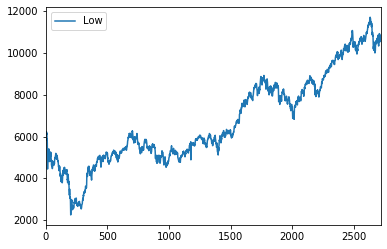

In [5]:
plotting_data.plot()

In [6]:
training_processed

array([[ 6109.850098],
       [ 6060.850098],
       [ 6126.399902],
       ...,
       [10817.150391],
       [10853.200195],
       [10735.049805]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

training_scaled = scaler.fit_transform(training_processed)

In [8]:
training_scaled

array([[0.40782428],
       [0.40264335],
       [0.40957415],
       ...,
       [0.90554311],
       [0.90935478],
       [0.89686234]])

In [9]:
features_set = []
labels = []
for i in range(60, 2684):
    features_set.append(training_scaled[i-60:i, 0])
    labels.append(training_scaled[i, 0])

In [10]:
features_set, labels = np.array(features_set), np.array(labels)
print(features_set.shape, labels.shape)

(2624, 60) (2624,)


In [11]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))


In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(features_set, labels, epochs = 1, batch_size = 1,verbose =1)

2624/2624 [==============================] - 35s 13ms/step - loss: 0.0022


In [29]:
testing_processed = testing_complete.iloc[:, 3:4].values

In [30]:
revert = testing_processed

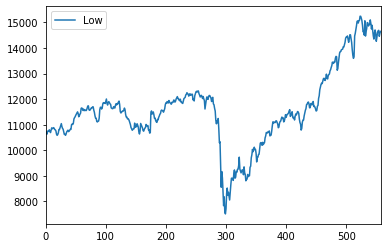

In [31]:
plotting_data = testing_complete.iloc[:, 3:4]
plotting_data.plot()

In [32]:
total = pd.concat((training_complete['Close'], testing_complete['Close']), axis=0)
total.shape

(3240,)

In [33]:
test_inputs = total[len(total) - len(testing_complete) - 60:].values
test_inputs.shape

(615,)

In [34]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [35]:
test_features = []
for i in range(60, test_inputs.shape[0]):
    test_features.append(test_inputs[i-60:i, 0])

In [36]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
print(test_features.shape)

(555, 60, 1)


In [37]:
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

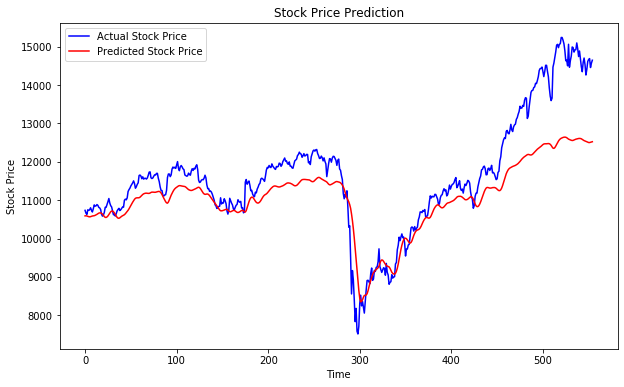

In [38]:
plt.figure(figsize=(10,6))
plt.plot(testing_processed, color='blue', label='Actual Stock Price')
plt.plot(predictions , color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [25]:
print(predictions)

[[10353.966 ]
 [10352.835 ]
 [10348.999 ]
 [10342.169 ]
 [10335.032 ]
 [10330.595 ]
 [10331.651 ]
 [10337.287 ]
 [10344.638 ]
 [10349.638 ]
 [10355.114 ]
 [10362.897 ]
 [10373.437 ]
 [10385.782 ]
 [10400.092 ]
 [10414.29  ]
 [10423.754 ]
 [10427.144 ]
 [10423.128 ]
 [10409.154 ]
 [10386.24  ]
 [10358.075 ]
 [10334.661 ]
 [10323.555 ]
 [10326.703 ]
 [10341.987 ]
 [10368.695 ]
 [10403.225 ]
 [10436.514 ]
 [10460.795 ]
 [10471.517 ]
 [10466.558 ]
 [10447.926 ]
 [10418.046 ]
 [10380.607 ]
 [10344.776 ]
 [10318.554 ]
 [10304.984 ]
 [10305.753 ]
 [10317.064 ]
 [10332.941 ]
 [10348.166 ]
 [10361.9795]
 [10377.982 ]
 [10399.187 ]
 [10425.057 ]
 [10452.071 ]
 [10480.83  ]
 [10514.441 ]
 [10553.376 ]
 [10594.799 ]
 [10637.205 ]
 [10679.022 ]
 [10719.959 ]
 [10758.133 ]
 [10789.619 ]
 [10809.478 ]
 [10820.749 ]
 [10825.988 ]
 [10831.291 ]
 [10842.719 ]
 [10862.831 ]
 [10887.881 ]
 [10912.122 ]
 [10933.826 ]
 [10950.5205]
 [10963.392 ]
 [10971.172 ]
 [10974.222 ]
 [10975.138 ]
 [10977.23  ]
 [1098

In [26]:
predictions_df = pd.DataFrame(predictions, columns = ['Predicted'])
predictions_df['Date'] = testing_complete['Date']
predictions_df.to_csv('predictions_1.csv')

In [27]:
testing_processed_df = pd.DataFrame(testing_processed, columns = ['Values'])
testing_processed_df['Date'] = testing_complete['Date']
testing_processed_df.to_csv('testing_processed.csv')